In [5]:
import numpy as np
import pandas as pd
import random
from random import choice
import math 
import networkx as nx
import matplotlib.pyplot as plt
from tkinter import Grid

# Part 1: Binning degree distributions

A. Binning real numbers

Using random library to generate 5000 data points from a Gaussian distribution.

In [5]:
x = np.random.normal(loc=2, scale=0.125, size=5000)

Using numpy.histogram to bin those number into 10 bins. 

In [6]:
bins = 10 # define number of bins 
ranged = None
normed = None
weights = None
density = None

hist = np.histogram(x, bins, ranged, normed, weights, density) # Constructs a hist with number of bins 
print(hist)

The 'numpy.histogram' produces two arrays, one with limit of bins and one with the amount of data points in each bin.
<br> The array of data points has a length of 10 while the array of bin limits has a length of 11. This is because it takes two bin limits to form one bin, but the two outer limits are only used once. Because of this, we simply remove the top limit.

In [ ]:
alteredY = [] # We create a new list for the y-coordinate for our line plot 
for i in hist[0]:
    alteredY.append(i) 
    alteredY.append(i) #  the list contains a duplicate of each occurency in order to 
                       #  plot the bin limits paired with the occurency of data points 

In [9]:
alteredX = [] # We create a new list for the x-coordinate (bin limits) for our line plot

alteredX.append(hist[1][0])
for i in hist[1][1:-1]:  
    alteredX.append(i) # create duplicate for each value in binlimits except the two outer-limit values 
    alteredX.append(i)
alteredX.append(hist[1][-1])

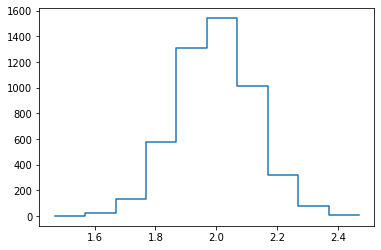

In [10]:
# Plot of the binned data 
plt.plot(alteredX,alteredY)

B. Binning integers 


In [9]:
xp = np.random.poisson(lam=10, size=5000) # Generates 5000 number from a Poission distribution

min = xp[0]
max = xp[0]
for i in xp:    # Iterates over values in xp and finds max and min
    if i > max:
        max = i
    if i < min:
        min = i
        
print("min: {}, max: {}".format(min,max)) 




[11  8 13 ...  8  6  8]
min: 2, max: 22


Sum of bincounts: 22


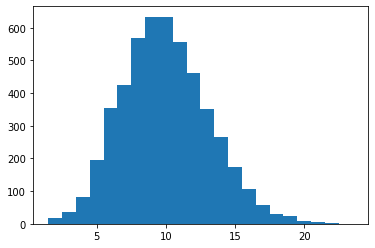

In [23]:
from tkinter import Grid

# create vector v to contain each integer value in its own bin
v = [min-0.5]

# iterates from 1 to max(xp) to generate bin-vector
for i in range(1,max+1):
    v.append(v[i-1]+1)
    
hist = np.histogram(xp,v) # generates histogram parameters 


# barplot of the poisson distribution
plt.bar(x=v[0:-1], height= hist[0], width= 1.0, align= 'edge') # Remove last bin limit
plt.grid("True")
plt.xlabel("[v]")
plt.ylabel("Counts")
plt.title("Poission distribution")

# calculating the sum of bincounts
print("Sum of bincounts: {}".format(sum(np.bincount(hist[0]))))


To construct the binning vector we used the min-value in <xp> to set the lower binlimit by simply subtracting 0.5, so that each integer value is in its own bin. Whi
In general the np.histogram will set the bin range, as (a.min(), a.max()). 'a' being the input data. Which in this case is the the xp-array generated from the gaussion distribution. being the So by altering over binning vector v. We account for that mistake 

In [15]:
print(v)
print(v[0:-1])

[1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5]
[1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5]


# Part 3: Watts-Strogatz Network 

Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0.1 and 1.

Calculate the average shortest path length <d> for each one. 


Describe what happens to the network when p = 1 

In [ ]:
N = 500
k = 4
p = np.array([0,0.1,1])
# Drawing graph
G = nx.watts_strogatz_graph(N,k,p[0])
G2 = nx.watts_strogatz_graph(N,k,p[1])
G3 = nx.watts_strogatz_graph(N,k,p[2])

options = {
    'node_color': 'pink',
    'node_size': 0.5,
    'width': 0.5,
}



pos = nx.circular_layout(G)
nx.draw(G,pos, **options)

pos2 = nx.circular_layout(G2)
nx.draw(G2,pos2, **options)

pos3 = nx.circular_layout(G3)
nx.draw(G3,pos3, **options)


plt.show()

ShortPath_G = nx.average_shortest_path_length(G)
ShortPath_G2 = nx.average_shortest_path_length(G2)
ShortPath_G3 = nx.average_shortest_path_length(G3)
print('With a p-value of 0.0 the average shortest path length in the graph is %s' % ShortPath_G)
print('With a p-value of 0.1 the average shortest path length in the graph is %s' % ShortPath_G2)
print('With a p-value of 1.0 the average shortest path length is the graph is  %s' % ShortPath_G3)

B

In [ ]:
def GraphGenerator(p):
    n = 50 
    k = 6
    N = 500
    AvS = []
    for i in range(1,n+1):
    
        G = nx.watts_strogatz_graph(N,k,p)
        S = nx.average_shortest_path_length(G)
        AvS.append(S)
    A = np.mean(AvS)
    M = np.std(AvS)
    
    return A,M 
 
A,M = GraphGenerator(0)
A1,M1 = GraphGenerator(0.01)  
A2,M2 = GraphGenerator(0.03)
A3,M3 = GraphGenerator(0.05)
A4,M4 = GraphGenerator(0.1)
A5,M5 = GraphGenerator(0.2)  

x = np.array([0,0.01,0.03,0.05,0.1,0.2])
y = np.array([A,A1,A2,A3,A4,A5])
E = np.array([M,M1,M2,M3,M4,M5])

import matplotlib.pyplot as plt
plt.plot(x, y, 'o-')
plt.errorbar(x,y,yerr=E )
plt.ylabel('<d>')
plt.xlabel('p')
plt.title('Wattz-strogats Network with p = {0, 0.01, 0.03, 0.05, 0.1, 0.2}')

plt.show()



# 4 The Barabasi-Albert Model

In [17]:
BA = nx.Graph()
BA.add_edge(0, 1)
nodeRep = [0,1]

In [18]:
for i in range(2,100):
    choice = random.choice(nodeRep)
    BA.add_edge(i,choice)
    nodeRep.append(i)
    nodeRep.append(choice)

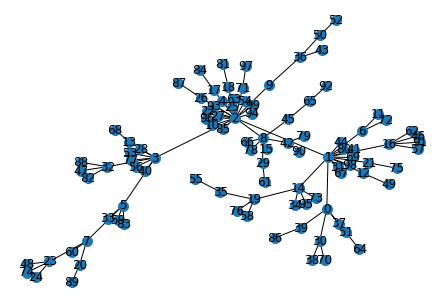

In [19]:
nx.draw(BA, with_labels=True, node_size=100)

In [20]:
BA2 = nx.Graph()
BA2.add_edge(0, 1)
nodeRep2 = [0,1]

In [21]:
for i in range(2,5000):
    choice = random.choice(nodeRep2)
    BA2.add_edge(i,choice)
    nodeRep2.append(i)
    nodeRep2.append(choice)

In [22]:
max = BA2.degree[0]
min = BA2.degree[0]
dd = []
for i in range(len(BA2.nodes)):
    dd.append(BA2.degree[i])
    if BA2.degree[i]<min:
        min = BA2.degree[i]
    if BA2.degree[i]>max:
        max = BA2.degree[i]

In [23]:
binEdges = [min-0.5]
for i in range(1,max+1):
    binEdges.append(binEdges[i-1]+1)

In [24]:
BA2_hist = np.histogram(dd, binEdges)

<BarContainer object of 108 artists>

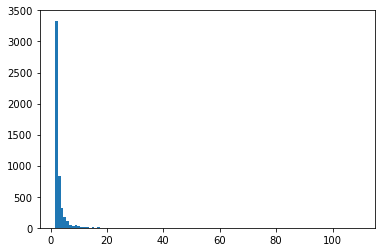

In [25]:
plt.bar(x=binEdges[1:], height=BA2_hist[0], width=1.0, align = 'edge')

In [26]:
for i in range(len(binEdges)):
    binEdges[i] = binEdges[i] + 0.5

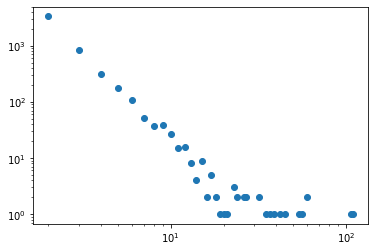

In [27]:
plt.loglog(binEdges[1:], BA2_hist[0], 'o')

In [23]:
xLog = []
yLog = []
for i in range(len(binEdges)-1):
    if BA2_hist[0][i] != 0:
        xLog.append(math.log10(binEdges[i+1]))
        yLog.append(math.log10(BA2_hist[0][i]))

# 5 Power-laws and the friendship paradox

Pick a node i at random (e.g. use random.choice). Find its degree. Find i's neighbors. And calculate their average degree. Compare the two numbers to check if it's true that i's friends (on average) have more friends than. Do this 1000 times. How many out of those 1000 times is the friendship paradox true in F-BA?

In [45]:
F_BA = BA2

In [46]:
paradox = 0
for i in range(1000):
    
    count = 0.0
    sum = 0.0
    choice = random.choice(list(F_BA.nodes))
    for n in F_BA.neighbors(choice):
        count = count + 1
        sum = sum + F_BA.degree(n)
    if (sum/count)>F_BA.degree(choice):
        paradox = paradox + 1
        
print("{}/{}".format(paradox,1000))

857/1000


What if the power law is flatter? Will the fraction of times the paradox is true be higher or lower?

The flatter the power law is, the wider it will spread. This means that the extreme nodes will be even more extreme with a very high degree.

Because more nodes, or people as in this case, will have a very high amount of friends the average amount of friends increases to an extent where very few people have more friends than the average of their friend group.

In [47]:
sequence = nx.utils.powerlaw_sequence(n = 1000, exponent = 1.5)
sequence = [round(num) for num in sequence]
sequence.sort()

In [48]:
#checking if sum of degrees is odd, fixing it if it is
sum = 0
for degree in sequence:
    sum = sum + degree
if (sum % 2) != 0:
    sequence[0] = sequence[0] + 1

In [49]:
model = nx.configuration_model(sequence)

In [50]:
dd = []
min = model.degree[0]
max = model.degree[0]
for i in range(len(model.nodes)):
    dd.append(model.degree[i])
    if model.degree[i]<min:
        min = model.degree[i]
    if model.degree[i]>max:
        max = model.degree[i]

In [51]:
binEdges = [min-0.5]
for i in range(1,max+1):
    binEdges.append(binEdges[i-1]+1)

In [52]:
model_hist = np.histogram(dd, binEdges)

In [53]:
for i in range(len(binEdges)):
    binEdges[i] = binEdges[i] + 0.5

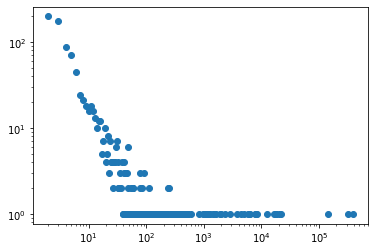

In [54]:
plt.loglog(binEdges[1:], model_hist[0], 'o')

In [55]:
paradox = 0
for i in range(len(model.nodes)):
    
    count = 0.0
    sum = 0.0
    choice = random.choice(list(model.nodes))
    for n in model.neighbors(choice):
        count = count + 1
        sum = sum + model.degree(n)
    if (sum/count)>model.degree(choice):
        paradox = paradox + 1
        
print("{}/{}".format(paradox,len(model.nodes)))

987/1000


 ## Part 6. Growth without Preferential Attachment
 
Finally, we'll build a network of same size and degree as in Part 5, using the growth mechanism without the preferential attachment. Follow the steps below for success

Grow a network with the same parameters as above, i.e. 5000 nodes, each new node connects to the existing network, but have the incoming nodes connect to the existing nodes with equal probability.

Let's call this the Sune-network.
Generate an ER network of same size and same  as the Sune-network.

What are the differences between the ER network and the Sune-network? Explain in your own words.

Hints: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.

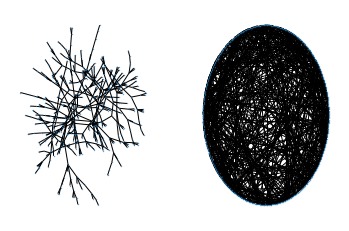

In [2]:
import networkx as nx
import random
from random import choice 

# Sune-network 
S = nx.Graph()
S.add_edge(0, 1)
NodeRep2 = [0,1]
N = 500
nodes = [0,1]

for i in range(2,N):
    S.add_edge(i,random.choice(nodes))
    nodes.append(i)
    
    
# Er Network 

# Use seed for reproducibility

ER = nx.gnm_random_graph(N, N-1)

import matplotlib.pyplot as plt 


subax1 = plt.subplot(121)
nx.draw(S, with_labels=False, node_size=0.1)
subax2 = plt.subplot(122)
nx.draw_shell(ER, with_labels=False, node_size=0.1)


    

#for n in S.nodes:
 #   C = random.choice(N)
  #  S.add_edge(i,C)
    


Graph with 500 nodes and 499 edges


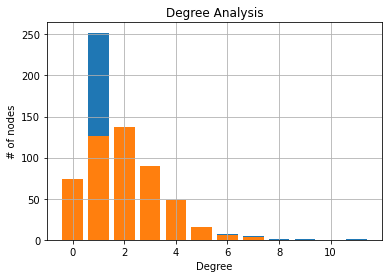

In [4]:
print(S)
import numpy as np

degree_sequence = sorted((d for n, d in S.degree()), reverse=True)
dmax = max(degree_sequence)
degree_sequence2 = sorted((d for n, d in ER.degree()), reverse=True)
dmax2 = max(degree_sequence)




#fig = plt.figure("Degree Analysis", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
#axgrid = fig.add_gridspec(5, 4)

plt.xlabel("Degree")
plt.ylabel("# of nodes")
plt.title("Degree plot")

plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.bar(*np.unique(degree_sequence2, return_counts=True))

plt.xlabel("Degree")
plt.ylabel("# of nodes")
plt.title("Degree Analysis")
plt.grid("True")

In [44]:
paradox = 0
for i in range(len(model.nodes)):
    
    count = 0.0
    sum = 0.0
    choice = random.choice(list(model.nodes))
    for n in model.neighbors(choice):
        count = count + 1
        sum = sum + model.degree(n)
    if (sum/count)>model.degree(choice):
        paradox = paradox + 1
        
print("{}/{}".format(paradox,len(model.nodes)))

NameError: name 'model' is not defined